# Data understanding and EDA

In [3]:
# Importing required libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
os.listdir()

['.config', 'drive', 'sample_data']

In [5]:

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Concept and technologies of Ai/Real estate.csv')

df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:
df.shape

(414, 8)

## checking for missing values

In [8]:
df.isnull().sum()

,0
No,0
X1 transaction date,0
X2 house age,0
X3 distance to the nearest MRT station,0
X4 number of convenience stores,0
X5 latitude,0
X6 longitude,0
Y house price of unit area,0


### removing categorical columns

In [9]:
# Remove categorical columns and 'Year' column
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
df.drop(columns=categorical_columns, inplace=True)  # Dropping categorical columns
df.drop(columns='No', inplace=True)  # Dropping 'Year' column


In [ ]:
## Visualization of missing value

In [10]:
# Calculate the percentage of missing values in each column
missing_percentage = df.isnull().mean() * 100

# Identify columns with more than 10% missing values
columns_to_drop = missing_percentage[missing_percentage > 10].index

# Drop the columns with more than 10% missing values
df.drop(columns=columns_to_drop, inplace=True)

# Display the columns that were dropped
print(f"Columns with more than 10% missing values: {columns_to_drop.tolist()}")

# Show the cleaned DataFrame shape
print(f"Cleaned DataFrame shape: {df.shape}")


Columns with more than 10% missing values: []
Cleaned DataFrame shape: (414, 7)


In [11]:
from sklearn.impute import SimpleImputer

# Impute missing values for numerical columns using median
numerical_imputer = SimpleImputer(strategy='median')

# Select only numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Apply the imputer to the numerical columns
df[numerical_columns] = numerical_imputer.fit_transform(df[numerical_columns])

# Check if any categorical columns exist and impute if necessary
categorical_columns = df.select_dtypes(include=['object']).columns

# Only perform categorical imputation if there are categorical columns
if categorical_columns.size > 0:
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])
else:
    print("No categorical columns to impute.")

# Check the missing values after imputation
print(f"Missing values after imputation: \n{df.isnull().sum()}")


No categorical columns to impute.
Missing values after imputation: 
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


## Basic visualizations after cleaned df

In [ ]:
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10.0,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9.0,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5.0,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5.0,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5.0,24.97937,121.54245,43.1


In [ ]:
df.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


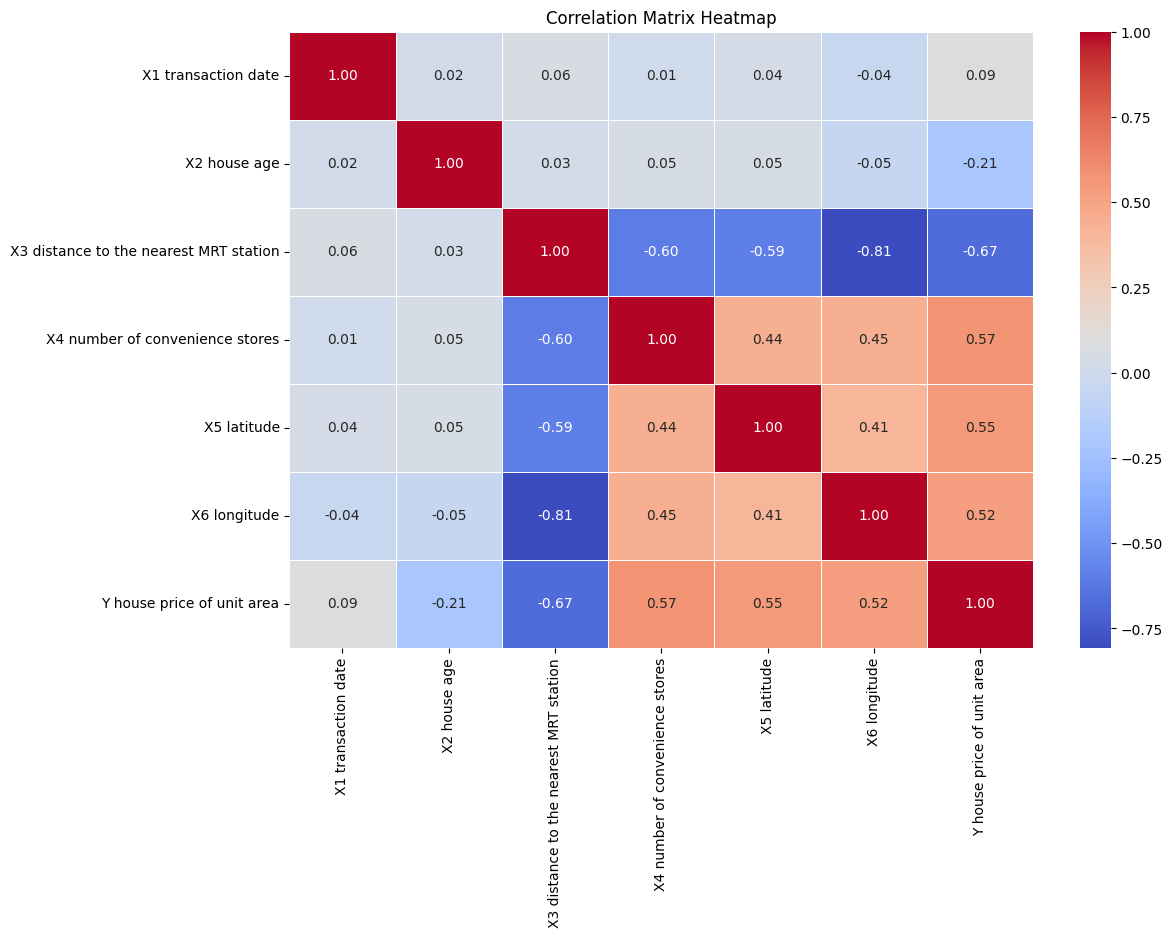

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Display the heatmap
plt.title("Correlation Matrix Heatmap")
plt.show()


# Outliers Detection

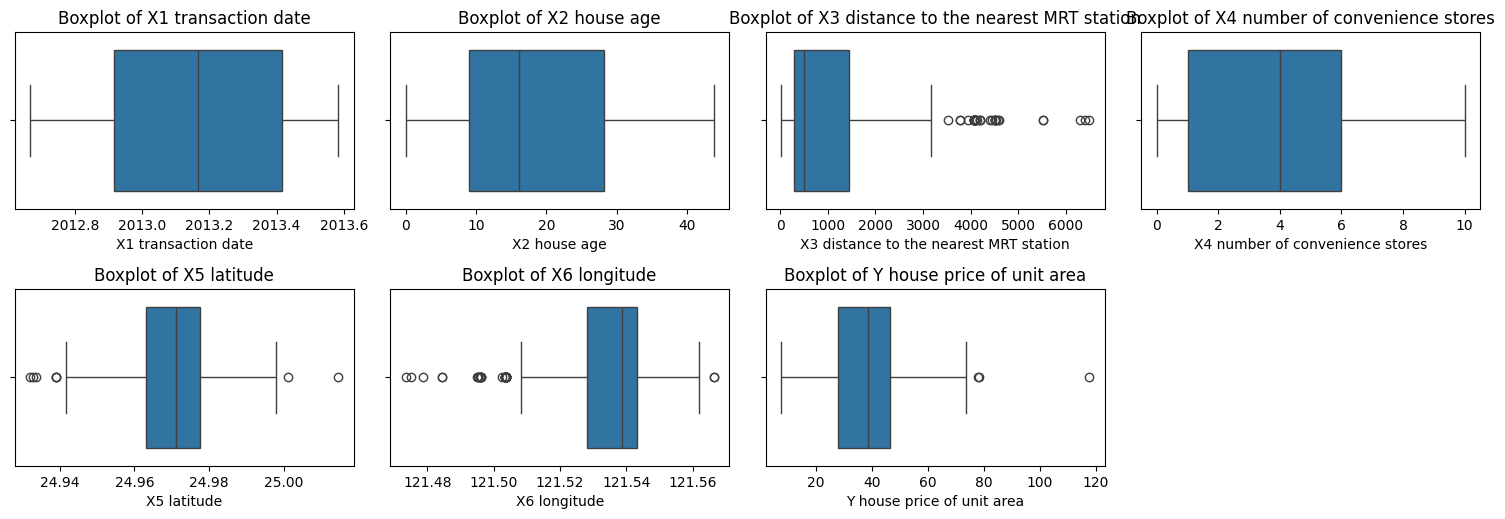

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for outlier detection
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Plot box plots for each numerical column to visualize outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(4, 4, i+1)  # Adjust the layout according to the number of columns
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


## Fixing outliers

In [ ]:
# Calculate IQR for each numerical column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect and fix outliers by capping them to the lower and upper bounds
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = df[col].clip(lower=lower_bound[col], upper=upper_bound[col])

# Check missing values after outlier handling
print(f"Missing values after outlier handling: \n{df.isnull().sum()}")


Missing values after outlier handling: 
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


# Model Building

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Splitting the data for model into train and split

In [ ]:
# Splitting dataset

X = df.drop(columns=["X3 distance to the nearest MRT station"])  # Features
y = df["X3 distance to the nearest MRT station"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Add bias term
X_train_bias = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_bias = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

def cost_function(X, Y, W):
    m = len(Y)
    Y_pred = np.dot(X, W)
    cost = (1 / (2 * m)) * np.sum((Y_pred - Y) ** 2)
    return cost

def gradient_descent(X, Y, W, alpha, iterations):
    m = len(Y)
    cost_history = []
    for i in range(iterations):
        Y_pred = np.dot(X, W)
        loss = Y_pred - Y
        gradient = (1 / m) * np.dot(X.T, loss)
        W -= alpha * gradient
        cost = cost_function(X, Y, W)
        cost_history.append(cost)
        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost:.4f}")
    return W, cost_history

def rmse(Y, Y_pred):
    return np.sqrt(mean_squared_error(Y, Y_pred))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

def main():
    W = np.zeros(X_train_bias.shape[1])
    alpha = 0.01
    iterations = 2000
    W_optimal, cost_history = gradient_descent(X_train_bias, y_train.values, W, alpha, iterations)

    # Plot cost function over iterations
    plt.plot(range(iterations), cost_history, label='Cost Reduction Over Iterations', color='blue')
    plt.xlabel('Iterations')
    plt.ylabel('Cost (MSE)')
    plt.title('Gradient Descent Convergence')
    plt.legend()
    plt.show()

    # Predictions
    Y_pred_train = np.dot(X_train_bias, W_optimal)
    Y_pred_test = np.dot(X_test_bias, W_optimal)

    # Training metrics
    train_mse = mean_squared_error(y_train, Y_pred_train)
    train_rmse = np.sqrt(train_mse)  # RMSE
    train_r2 = r2_score(y_train, Y_pred_train)

    # Test metrics
    test_mse = mean_squared_error(y_test, Y_pred_test)
    test_rmse = np.sqrt(test_mse)  # RMSE
    test_r2 = r2_score(y_test, Y_pred_test)

    # Print results
    print("Final Weights:", W_optimal)
    print("MSE on Training Set:", train_mse)
    print("RMSE on Training Set:", train_rmse)
    print("R-Squared on Training Set:", train_r2)
    print()
    print("MSE on Test Set:", test_mse)
    print("RMSE on Test Set:", test_rmse)
    print("R-Squared on Test Set:", test_r2)
    # Check for infinite values
    print(np.any(np.isinf(y_train)))
    print(np.any(np.isinf(Y_pred_train)))




Iteration 0: Cost = 900408.9135
Iteration 100: Cost = 181117.2733
Iteration 200: Cost = 122323.4222
Iteration 300: Cost = 114133.5233
Iteration 400: Cost = 112840.6260
Iteration 500: Cost = 112593.7223
Iteration 600: Cost = 112530.3066
Iteration 700: Cost = 112508.0833
Iteration 800: Cost = 112498.4032
Iteration 900: Cost = 112493.6565
Iteration 1000: Cost = 112491.1857
Iteration 1100: Cost = 112489.8599
Iteration 1200: Cost = 112489.1372
Iteration 1300: Cost = 112488.7399
Iteration 1400: Cost = 112488.5204
Iteration 1500: Cost = 112488.3990
Iteration 1600: Cost = 112488.3317
Iteration 1700: Cost = 112488.2943
Iteration 1800: Cost = 112488.2736
Iteration 1900: Cost = 112488.2621


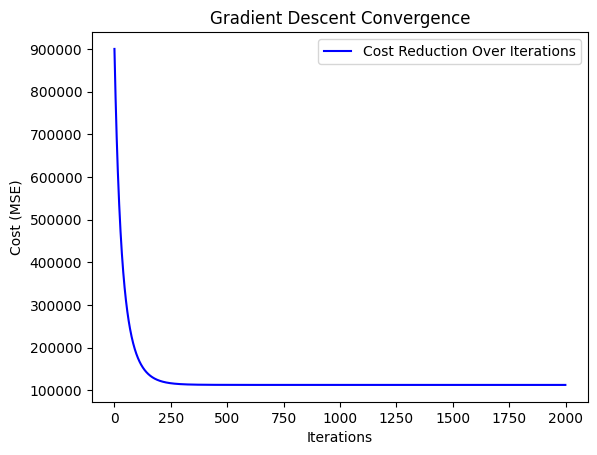

Final Weights: [ 963.80126621   73.64894097  -68.71904236 -196.90992343 -128.55647848
 -420.45139646 -298.09674381]
MSE on Training Set: 224976.5115153199
RMSE on Training Set: 474.3168893422623
R-Squared on Training Set: 0.7562611063963142

MSE on Test Set: 192280.58116307785
RMSE on Test Set: 438.4980971031435
R-Squared on Test Set: 0.8054040971068569
False
False


In [ ]:
if __name__ == "__main__":
    main()


## Models using sklearn

## Linear regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predict on training and test sets
y_pred_train_lr = lr_model.predict(X_train_scaled)
y_pred_test_lr = lr_model.predict(X_test_scaled)

# Calculate metrics for Linear Regression
train_mse_lr = mean_squared_error(y_train, y_pred_train_lr)
train_rmse_lr = np.sqrt(train_mse_lr)
train_r2_lr = r2_score(y_train, y_pred_train_lr)

test_mse_lr = mean_squared_error(y_test, y_pred_test_lr)
test_rmse_lr = np.sqrt(test_mse_lr)
test_r2_lr = r2_score(y_test, y_pred_test_lr)

# Print results for Linear Regression
print("Linear Regression Results:")
print(f"MSE on Training Set: {train_mse_lr}")
print(f"RMSE on Training Set: {train_rmse_lr}")
print(f"R-Squared on Training Set: {train_r2_lr}")
print()
print(f"MSE on Test Set: {test_mse_lr}")
print(f"RMSE on Test Set: {test_rmse_lr}")
print(f"R-Squared on Test Set: {test_r2_lr}")


Linear Regression Results:
MSE on Training Set: 224976.49548667728
RMSE on Training Set: 474.3168724457072
R-Squared on Training Set: 0.7562611237616986

MSE on Test Set: 192275.46493391407
RMSE on Test Set: 438.49226325434074
R-Squared on Test Set: 0.805409274942432


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict on training and test sets
y_pred_train_rf = rf_model.predict(X_train_scaled)
y_pred_test_rf = rf_model.predict(X_test_scaled)

# Calculate metrics for Random Forest
train_mse_rf = mean_squared_error(y_train, y_pred_train_rf)
train_rmse_rf = np.sqrt(train_mse_rf)
train_r2_rf = r2_score(y_train, y_pred_train_rf)

test_mse_rf = mean_squared_error(y_test, y_pred_test_rf)
test_rmse_rf = np.sqrt(test_mse_rf)
test_r2_rf = r2_score(y_test, y_pred_test_rf)

# Print results for Random Forest
print("Random Forest Results:")
print(f"MSE on Training Set: {train_mse_rf}")
print(f"RMSE on Training Set: {train_rmse_rf}")
print(f"R-Squared on Training Set: {train_r2_rf}")
print()
print(f"MSE on Test Set: {test_mse_rf}")
print(f"RMSE on Test Set: {test_rmse_rf}")
print(f"R-Squared on Test Set: {test_r2_rf}")


Random Forest Results:
MSE on Training Set: 1415.9072118747647
RMSE on Training Set: 37.62854251595144
R-Squared on Training Set: 0.9984660102739465

MSE on Test Set: 8002.62028957485
RMSE on Test Set: 89.4573657647868
R-Squared on Test Set: 0.9919010171940346


# Hyper-parameter Optimization with Cross-Validation

## Linear Regression (Ridge)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Hyperparameters for Ridge Regression
ridge_param_grid = {
    'alpha': [0.1, 1, 10, 100, 1000]  # Range of values for regularization strength
}

# Initialize Ridge model
ridge_model = Ridge()

# Apply GridSearchCV
ridge_grid_search = GridSearchCV(estimator=ridge_model, param_grid=ridge_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ridge_grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
print(f"Best hyperparameters for Ridge Regression: {ridge_grid_search.best_params_}")


Best hyperparameters for Ridge Regression: {'alpha': 10}


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Hyperparameters for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required to be a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider for the best split
    'bootstrap': [True, False]  # Whether to use bootstrap samples
}

# Initialize Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Apply GridSearchCV
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=2)
rf_grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
print(f"Best hyperparameters for Random Forest: {rf_grid_search.best_params_}")


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
827 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/ut

Best hyperparameters for Random Forest: {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


# Feature Selectin

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Select K best features using f_regression
k = 8  # Number of features to select
selector = SelectKBest(score_func=f_regression, k=k)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Display selected feature names
selected_features = X_train.columns[selector.get_support()]
print(f"Selected Features: {selected_features}")


Selected Features: Index(['X1 transaction date', 'X2 house age',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=8 is greater than n_features=6. All the features will be returned.
  warnings.warn(


##  Linear Regression Model (with selected features and optimal hyperparameters)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Use optimal alpha identified from hyperparameter tuning (for example, alpha=1.0)
alpha_optimal = 1.0  # Adjust based on hyperparameter tuning results

# Rebuild Ridge Regression model using the optimal alpha and selected features
ridge_model_final = Ridge(alpha=alpha_optimal)
ridge_model_final.fit(X_train_selected, y_train)

# Predict on training and test sets
y_pred_train_ridge_final = ridge_model_final.predict(X_train_selected)
y_pred_test_ridge_final = ridge_model_final.predict(X_test_selected)

# Calculate metrics for the final Ridge Regression model
train_mse_ridge_final = mean_squared_error(y_train, y_pred_train_ridge_final)
train_rmse_ridge_final = np.sqrt(train_mse_ridge_final)
train_r2_ridge_final = r2_score(y_train, y_pred_train_ridge_final)

test_mse_ridge_final = mean_squared_error(y_test, y_pred_test_ridge_final)
test_rmse_ridge_final = np.sqrt(test_mse_ridge_final)
test_r2_ridge_final = r2_score(y_test, y_pred_test_ridge_final)

# Print results for the final Ridge Regression model
print("Final Ridge Regression Results:")
print(f"MSE on Training Set: {train_mse_ridge_final}")
print(f"RMSE on Training Set: {train_rmse_ridge_final}")
print(f"R-Squared on Training Set: {train_r2_ridge_final}")
print()
print(f"MSE on Test Set: {test_mse_ridge_final}")
print(f"RMSE on Test Set: {test_rmse_ridge_final}")
print(f"R-Squared on Test Set: {test_r2_ridge_final}")


Final Ridge Regression Results:
MSE on Training Set: 224978.49327570677
RMSE on Training Set: 474.3189784055734
R-Squared on Training Set: 0.7562589593629158

MSE on Test Set: 192274.93158400673
RMSE on Test Set: 438.49165509050084
R-Squared on Test Set: 0.8054098147146032


##  Random Forest Model (with selected features and optimal hyperparameters)

In [ ]:

best_params = rf_grid_search.best_params_
print(f"Best hyperparameters for Random Forest: {best_params}")

rf_model_final = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    bootstrap=best_params['bootstrap'],
    random_state=42
)

# Train the final model with selected features
rf_model_final.fit(X_train_selected, y_train)

# Predict and evaluate the final model
y_pred_train_rf_final = rf_model_final.predict(X_train_selected)
y_pred_test_rf_final = rf_model_final.predict(X_test_selected)

train_mse_rf_final = mean_squared_error(y_train, y_pred_train_rf_final)
train_rmse_rf_final = np.sqrt(train_mse_rf_final)
train_r2_rf_final = r2_score(y_train, y_pred_train_rf_final)

test_mse_rf_final = mean_squared_error(y_test, y_pred_test_rf_final)
test_rmse_rf_final = np.sqrt(test_mse_rf_final)
test_r2_rf_final = r2_score(y_test, y_pred_test_rf_final)

# Print the results for the final model
print("Final Random Forest Results:")
print(f"MSE on Training Set: {train_mse_rf_final}")
print(f"RMSE on Training Set: {train_rmse_rf_final}")
print(f"R-Squared on Training Set: {train_r2_rf_final}")
print()
print(f"MSE on Test Set: {test_mse_rf_final}")
print(f"RMSE on Test Set: {test_rmse_rf_final}")
print(f"R-Squared on Test Set: {test_r2_rf_final}")

Best hyperparameters for Random Forest: {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Final Random Forest Results:
MSE on Training Set: 8.72752151605815e-05
RMSE on Training Set: 0.009342120485231472
R-Squared on Training Set: 0.9999999999054463

MSE on Test Set: 7273.603701446598
RMSE on Test Set: 85.28542490629098
R-Squared on Test Set: 0.9926388121410479
